In [166]:
#Importing initial libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [167]:
lds=pd.read_csv(r"C:\Users\sunde\Desktop\Upgrad- Sandeep\Lead Scoring Assignment\Leads.csv")

In [168]:
lds

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [169]:
lds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [170]:
lds.shape

(9240, 37)

In [171]:
lds.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [172]:
#Duplicate row identification

sum(lds.duplicated(subset=None))==0

True

In [173]:
#duplicate columns identification by unique column

sum(lds.duplicated(subset='Prospect ID'))==0

True

In [174]:
#Replacing 'Select' values by NaN.

lds = lds.replace('Select', np.nan)

In [175]:
#checking null values

lds.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [176]:
#Calculating percentage of null values in each column

round(100*(lds.isnull().sum()/len(lds.index)), 1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [177]:
#Dropping the columns having more than 45% NA values by checking the previous result.
lds = lds.drop(lds.loc[:,list(round(100*(lds.isnull().sum()/len(lds.index)), 1)>=45)].columns, 1)

In [178]:
lds.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [179]:
round(100*(lds.isnull().sum()/len(lds.index)), 1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [180]:
#checking value counts of 'City' column

lds['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [181]:
#Replacing the missing values by 'Mumbai'

lds['City'] = lds['City'].replace(np.nan,'Mumbai')

In [182]:
#Checking value counts of 'Tag' variable

lds['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [183]:
#Replacing the missing values by 'Unknown'

lds['Tags'] = lds['Tags'].replace(np.nan,'Unknown')

In [184]:
#Checking value counts of 'Specialization' variable

lds['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [185]:
#Replacing the missing values by 'Unknown'

lds['Specialization'].replace(np.nan,'Unknown')

0                         Unknown
1                         Unknown
2         Business Administration
3           Media and Advertising
4                         Unknown
                  ...            
9235       IT Projects Management
9236        Media and Advertising
9237      Business Administration
9238    Human Resource Management
9239      Supply Chain Management
Name: Specialization, Length: 9240, dtype: object

In [186]:
#Checking value counts of 'What matters most to you in choosing a course' variable

lds['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [187]:
#Replacing the missing values by 'Better Career Prospects'

lds['What matters most to you in choosing a course'] = lds['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [188]:
#Checking value counts of 'Country' variable

lds['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
Canada                     4
Kuwait                     4
South Africa               4
Sweden                     3
Ghana                      2
China                      2
Netherlands                2
Italy                      2
Philippines                2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Belgium                    2
Liberia                    1
Sri Lanka                  1
Indonesia                  1
Denmark                    1
Tanzania                   1
Vietnam       

In [189]:
#Replacing the missing values by 'India'

lds['Country'] = lds['Country'].replace(np.nan,'India')

In [190]:
round(100*(lds.isnull().sum()/len(lds.index)), 1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                           0.0
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course     0.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [191]:
#Checking value counts of 'What is your current occupation' variable

lds['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [192]:
#Replacing the missing values by 'Unemployed   '

lds['What is your current occupation'] = lds['What is your current occupation'].replace(np.nan,'Unemployed')

In [193]:
lds

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,No,No,Unknown,No,No,Other Metro Cities,No,No,SMS Sent


In [194]:
# Rest missing values are under 2%, hence we can drop these rows.
lds.dropna(inplace = True)

In [195]:
#Again calculating percentage of null values in each column

round(100*(lds.isnull().sum()/len(lds.index)), 1)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [196]:
lds['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4760
API                         665
Lead Add Form               353
Lead Import                  14
Name: Lead Origin, dtype: int64

In [197]:
lds['Do Not Call'].value_counts(dropna=False)

No     5790
Yes       2
Name: Do Not Call, dtype: int64

In [198]:
lds['Do Not Email'].value_counts(dropna=False)

No     5286
Yes     506
Name: Do Not Email, dtype: int64

In [199]:
lds['Lead Source'].value_counts(dropna=False)

Direct Traffic       2381
Google               1969
Organic Search        787
Reference             332
Olark Chat            242
Referral Sites         35
Welingak Website       15
Facebook               14
Click2call              4
Press_Release           2
Social Media            2
bing                    2
blog                    1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
WeLearn                 1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [200]:
lds['Magazine'].value_counts(dropna=False)

No    5792
Name: Magazine, dtype: int64

In [201]:
lds['Newspaper Article'].value_counts(dropna=False)

No     5791
Yes       1
Name: Newspaper Article, dtype: int64

In [202]:
lds['X Education Forums'].value_counts(dropna=False)

No     5791
Yes       1
Name: X Education Forums, dtype: int64

In [203]:
lds['Newspaper'].value_counts(dropna=False)

No     5791
Yes       1
Name: Newspaper, dtype: int64

In [204]:
lds['Digital Advertisement'].value_counts(dropna=False)

No     5789
Yes       3
Name: Digital Advertisement, dtype: int64

In [205]:
lds['Through Recommendations'].value_counts(dropna=False)

No     5786
Yes       6
Name: Through Recommendations, dtype: int64

In [206]:
lds['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    5792
Name: Receive More Updates About Our Courses, dtype: int64

In [207]:
lds['Update me on Supply Chain Content'].value_counts(dropna=False)

No    5792
Name: Update me on Supply Chain Content, dtype: int64

In [208]:
lds['Get updates on DM Content'].value_counts(dropna=False)

No    5792
Name: Get updates on DM Content, dtype: int64

In [209]:
lds['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    5792
Name: Receive More Updates About Our Courses, dtype: int64

In [210]:
lds['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    5792
Name: I agree to pay the amount through cheque, dtype: int64

In [211]:
lds['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     2910
Yes    2882
Name: A free copy of Mastering The Interview, dtype: int64

In [212]:
lds['Last Activity'].value_counts(dropna=False)

Email Opened                    2344
SMS Sent                        1932
Page Visited on Website          488
Converted to Lead                267
Email Bounced                    205
Email Link Clicked               150
Olark Chat Conversation          146
Form Submitted on Website        114
Unreachable                       71
Unsubscribed                      44
Had a Phone Conversation          20
Approached upfront                 3
View in browser link Clicked       3
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [213]:
lds['Last Notable Activity'].value_counts(dropna=False)

Email Opened                    1974
Modified                        1796
SMS Sent                        1541
Page Visited on Website          235
Email Link Clicked               100
Olark Chat Conversation           35
Email Bounced                     33
Unsubscribed                      33
Unreachable                       26
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [214]:
#deleting unnecessary columns
lds.drop(['Lead Number','Search','Do Not Call','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1, inplace=True)

In [215]:
lds

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,Unemployed,Better Career Prospects,Unknown,Thane & Outskirts,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,Unknown,Mumbai,No,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,wrong number given,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,invalid number,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Unemployed,Better Career Prospects,Unknown,Other Metro Cities,No,SMS Sent


In [216]:
lds['TotalVisits'].describe()

count    5792.000000
mean        4.383115
std         5.362541
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

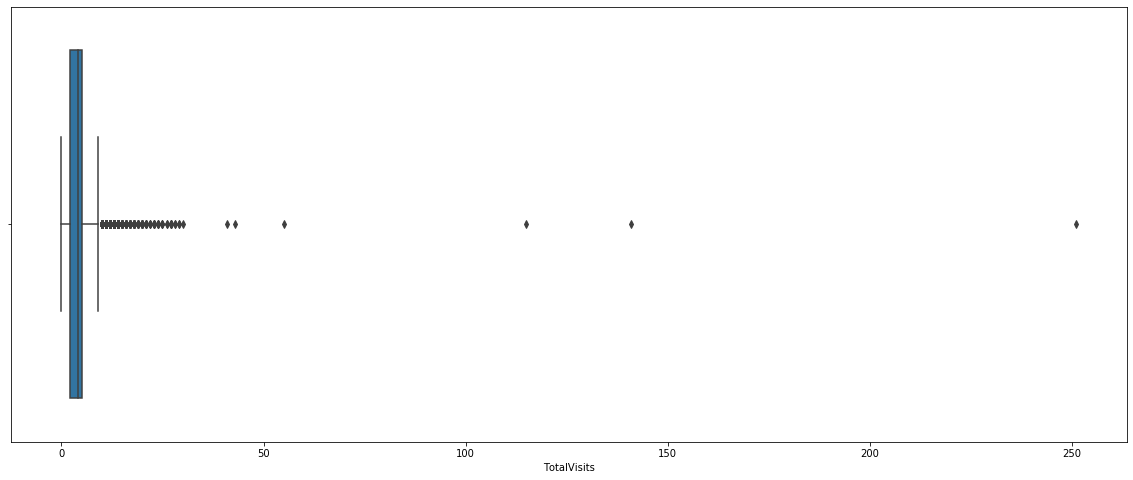

In [217]:
plt.figure(figsize=(20,8))
sns.boxplot(lds['TotalVisits'])

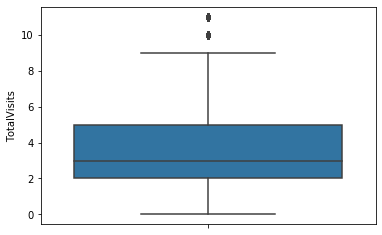

In [218]:
#Outlier handling: 
#Removing top & bottom 5% of the Column Outliers

q3 = lds.TotalVisits.quantile(0.95)
lds = lds[(lds.TotalVisits <= q3)]
q1 = lds.TotalVisits.quantile(0.05)
lds = lds[(lds.TotalVisits >= q1)]
sns.boxplot(y=lds['TotalVisits'])
plt.show()

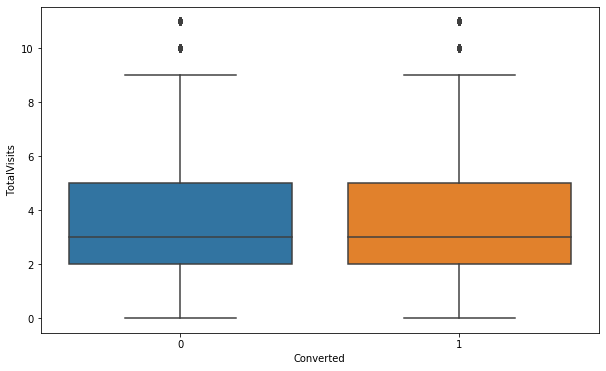

In [219]:
plt.figure(figsize=(10,6))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lds)

In [220]:
lds['Total Time Spent on Website'].describe()

count    5566.000000
mean      600.645526
std       554.944200
min         0.000000
25%       129.000000
50%       363.000000
75%      1081.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

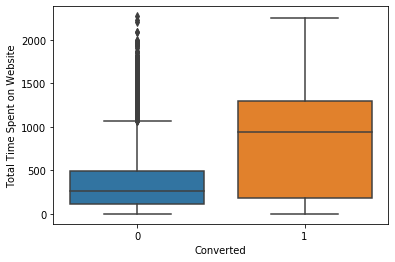

In [221]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lds)

In [222]:
lds['Page Views Per Visit'].describe()

count    5566.000000
mean        2.935923
std         1.855318
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: Page Views Per Visit, dtype: float64

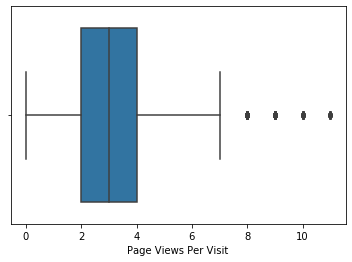

In [223]:
sns.boxplot(lds['Page Views Per Visit'])

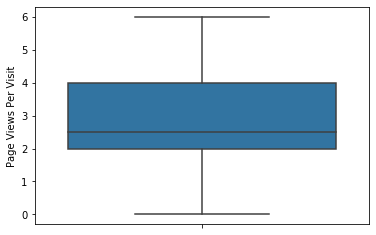

In [224]:
#Outlier handling: 
#Removing top & bottom 5% of the Column Outliers

q3 = lds['Page Views Per Visit'].quantile(0.95)
lds = lds[(lds['Page Views Per Visit'] <= q3)]
q1 = lds['Page Views Per Visit'].quantile(0.05)
lds = lds[(lds['Page Views Per Visit'] >= q1)]
sns.boxplot(y=lds['Page Views Per Visit'])
plt.show()

In [225]:
#Here Converted is the target variable

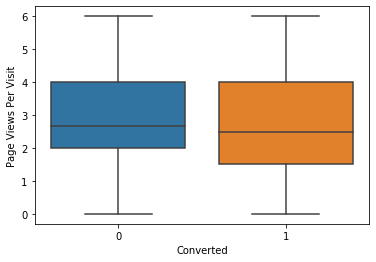

In [226]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lds)

[Text(0, 0, 'Business Administration'),
 Text(0, 0, 'Media and Advertising'),
 Text(0, 0, 'Supply Chain Management'),
 Text(0, 0, 'IT Projects Management'),
 Text(0, 0, 'Finance Management'),
 Text(0, 0, 'Human Resource Management'),
 Text(0, 0, 'Marketing Management'),
 Text(0, 0, 'Banking, Investment And Insurance'),
 Text(0, 0, 'Travel and Tourism'),
 Text(0, 0, 'International Business'),
 Text(0, 0, 'E-COMMERCE'),
 Text(0, 0, 'Operations Management'),
 Text(0, 0, 'Services Excellence'),
 Text(0, 0, 'Hospitality Management'),
 Text(0, 0, 'Retail Management'),
 Text(0, 0, 'Rural and Agribusiness'),
 Text(0, 0, 'Healthcare Management'),
 Text(0, 0, 'E-Business')]

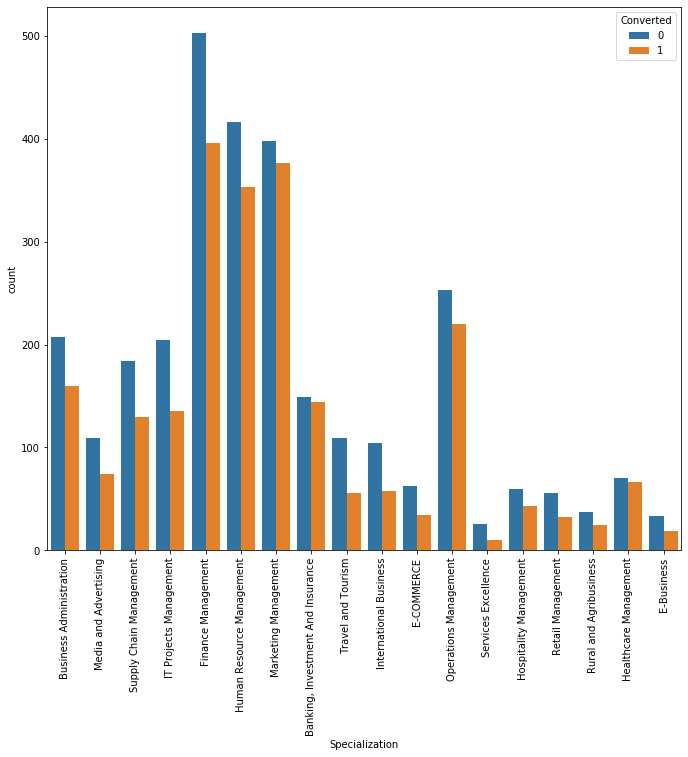

In [227]:
plt.figure(figsize=(25,10))

g=plt.subplot(1, 2, 1)
g=sns.countplot(lds['Specialization'], hue=lds.Converted)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [228]:
lds['Specialization'] = lds['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')  

[Text(0, 0, 'Direct Traffic'),
 Text(0, 0, 'Google'),
 Text(0, 0, 'Organic Search'),
 Text(0, 0, 'Referral Sites'),
 Text(0, 0, 'Olark Chat'),
 Text(0, 0, 'Reference'),
 Text(0, 0, 'Welingak Website'),
 Text(0, 0, 'Facebook'),
 Text(0, 0, 'blog'),
 Text(0, 0, 'Pay per Click Ads'),
 Text(0, 0, 'bing'),
 Text(0, 0, 'Social Media'),
 Text(0, 0, 'WeLearn'),
 Text(0, 0, 'welearnblog_Home'),
 Text(0, 0, 'youtubechannel'),
 Text(0, 0, 'Click2call'),
 Text(0, 0, 'testone'),
 Text(0, 0, 'Press_Release'),
 Text(0, 0, 'NC_EDM')]

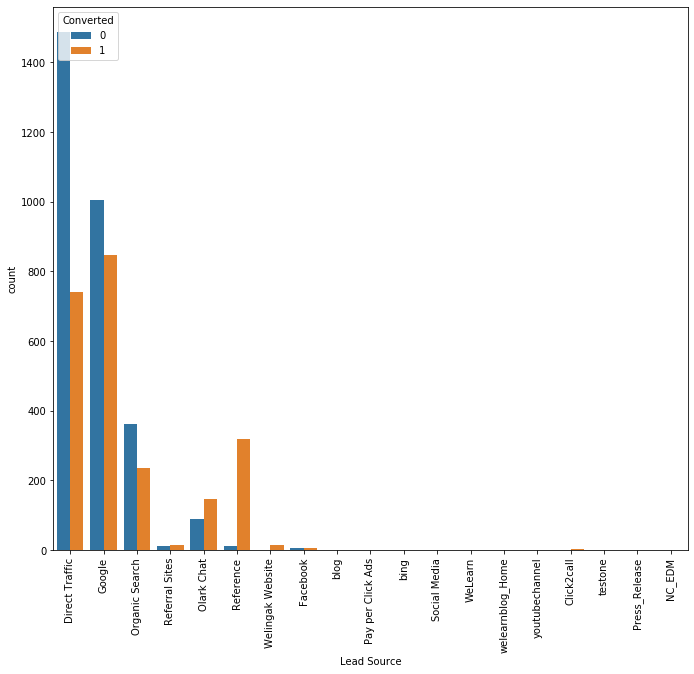

In [229]:
plt.figure(figsize=(25,10))

s1=plt.subplot(1, 2, 1)
s1=sns.countplot(lds['Lead Source'], hue=lds.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

In [230]:
lds['Lead Source'] = lds['Lead Source'].replace('Facebook','Social Media')
lds['Lead Source'] = lds['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                 'WeLearn','blog','Pay per Click Ads','testone','NC_EDM''Referral Sites','Welingak Website',] ,'Others') 

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

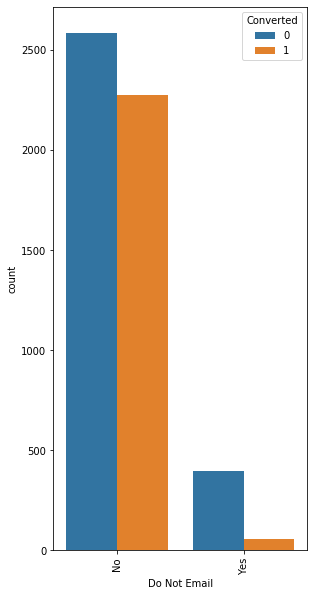

In [231]:
plt.figure(figsize=(10,10))

s2=plt.subplot(1, 2, 1)
s2=sns.countplot(lds['Do Not Email'], hue=lds.Converted)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)

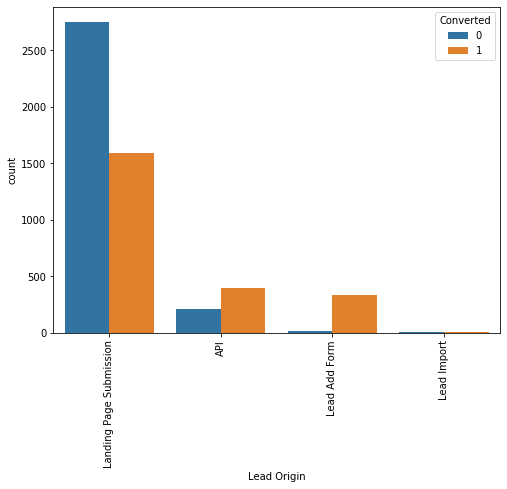

In [232]:
plt.figure(figsize=(8,6))
g1=sns.countplot(lds['Lead Origin'], hue=lds.Converted)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
plt.show()

[Text(0, 0, 'Email Opened'),
 Text(0, 0, 'Unreachable'),
 Text(0, 0, 'Page Visited on Website'),
 Text(0, 0, 'Email Bounced'),
 Text(0, 0, 'Converted to Lead'),
 Text(0, 0, 'Email Link Clicked'),
 Text(0, 0, 'Form Submitted on Website'),
 Text(0, 0, 'Had a Phone Conversation'),
 Text(0, 0, 'View in browser link Clicked'),
 Text(0, 0, 'Olark Chat Conversation'),
 Text(0, 0, 'Unsubscribed'),
 Text(0, 0, 'SMS Sent'),
 Text(0, 0, 'Visited Booth in Tradeshow'),
 Text(0, 0, 'Approached upfront'),
 Text(0, 0, 'Email Received'),
 Text(0, 0, 'Email Marked Spam')]

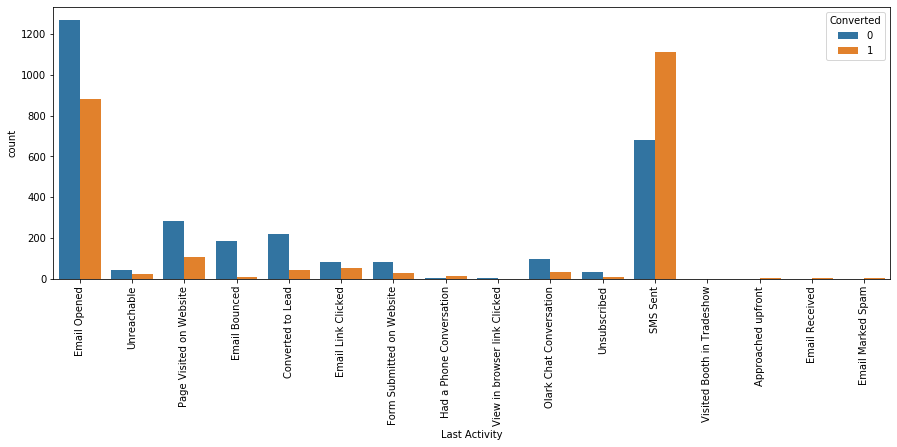

In [233]:
fig, axs = plt.subplots(figsize = (15,5))
s3=sns.countplot(x = "Last Activity", hue = "Converted", data = lds)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)

In [234]:
lds['Last Activity'] = lds['Last Activity'].replace(['Unreachable','Unsubscribed','Approached upfront','View in browser link Clicked',       
                                                     'Email Marked Spam','Email Received','Visited Booth in Tradeshow'],'Others')

[Text(0, 0, 'Email Opened'),
 Text(0, 0, 'Modified'),
 Text(0, 0, 'Page Visited on Website'),
 Text(0, 0, 'Email Bounced'),
 Text(0, 0, 'Email Link Clicked'),
 Text(0, 0, 'Unreachable'),
 Text(0, 0, 'Had a Phone Conversation'),
 Text(0, 0, 'Olark Chat Conversation'),
 Text(0, 0, 'Unsubscribed'),
 Text(0, 0, 'SMS Sent'),
 Text(0, 0, 'Approached upfront'),
 Text(0, 0, 'View in browser link Clicked'),
 Text(0, 0, 'Form Submitted on Website'),
 Text(0, 0, 'Email Received'),
 Text(0, 0, 'Email Marked Spam')]

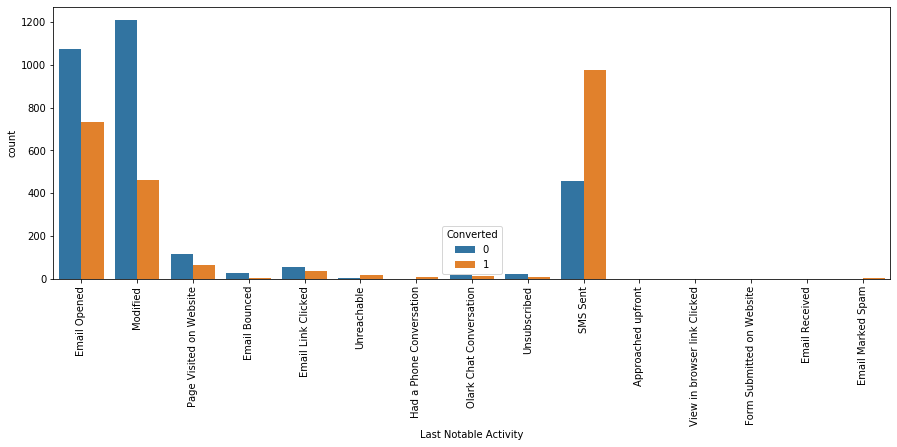

In [235]:
fig, axs = plt.subplots(figsize = (15,5))
s=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lds)
s.set_xticklabels(s.get_xticklabels(),rotation=90)

In [236]:
lds['Last Notable Activity'] = lds['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed',
                                                                     'Email Bounced', 'Resubscribed to emails','View in browser link Clicked',
                                                                     'Approached upfront', 'Form Submitted on Website', 'Email Received'],'Others')

[Text(0, 0, 'Will revert after reading the email'),
 Text(0, 0, 'Ringing'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'Lost to EINS'),
 Text(0, 0, 'Interested in other courses'),
 Text(0, 0, 'Busy'),
 Text(0, 0, 'in touch with EINS'),
 Text(0, 0, 'Already a student'),
 Text(0, 0, 'Diploma holder (Not Eligible)'),
 Text(0, 0, 'Graduation in progress'),
 Text(0, 0, 'number not provided'),
 Text(0, 0, 'switched off'),
 Text(0, 0, 'Closed by Horizzon'),
 Text(0, 0, 'Not doing further education'),
 Text(0, 0, 'invalid number'),
 Text(0, 0, 'Interested  in full time MBA'),
 Text(0, 0, 'wrong number given'),
 Text(0, 0, 'opp hangup'),
 Text(0, 0, 'Still Thinking'),
 Text(0, 0, 'Lost to Others'),
 Text(0, 0, 'Shall take in the next coming month'),
 Text(0, 0, 'Interested in Next batch'),
 Text(0, 0, 'Recognition issue (DEC approval)'),
 Text(0, 0, 'Want to take admission but has financial problems'),
 Text(0, 0, 'In confusion whether part time or DLP'),
 Text(0, 0, 'University not recognized')]

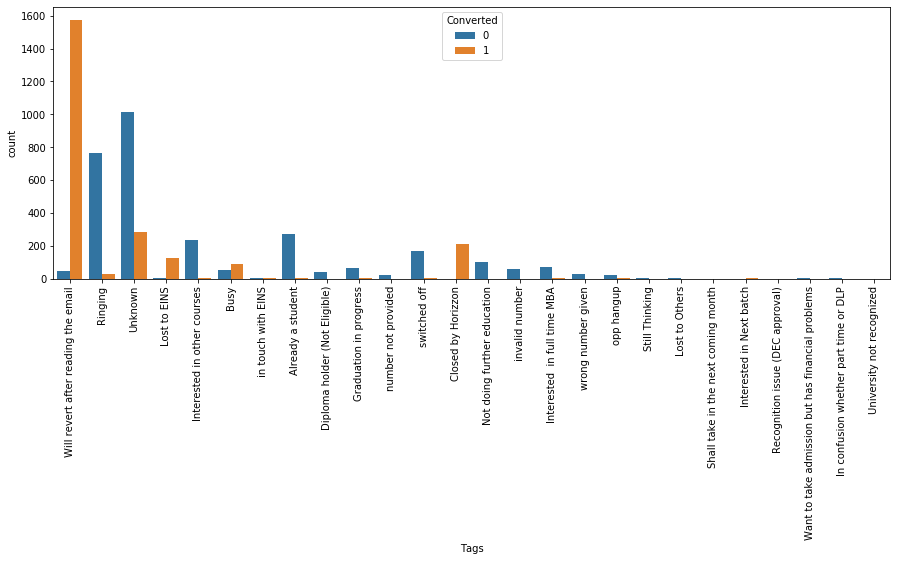

In [237]:
fig, axs = plt.subplots(figsize = (15,5))
s4=sns.countplot(x = "Tags", hue = "Converted", data = lds)
s4.set_xticklabels(s4.get_xticklabels(),rotation=90)

In [238]:
lds['Tags'] = lds['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS', 'Busy',
                                     'Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','Not doing further education',
                                    'invalid number','wrong number given','Interested  in full time MBA','Diploma holder (Not Eligible)'], 'Others')

[Text(0, 0, 'Business Administration'),
 Text(0, 0, 'Media and Advertising'),
 Text(0, 0, 'Management'),
 Text(0, 0, 'Banking, Investment And Insurance'),
 Text(0, 0, 'Travel and Tourism'),
 Text(0, 0, 'International Business'),
 Text(0, 0, 'E-COMMERCE'),
 Text(0, 0, 'Services Excellence'),
 Text(0, 0, 'Rural and Agribusiness'),
 Text(0, 0, 'E-Business')]

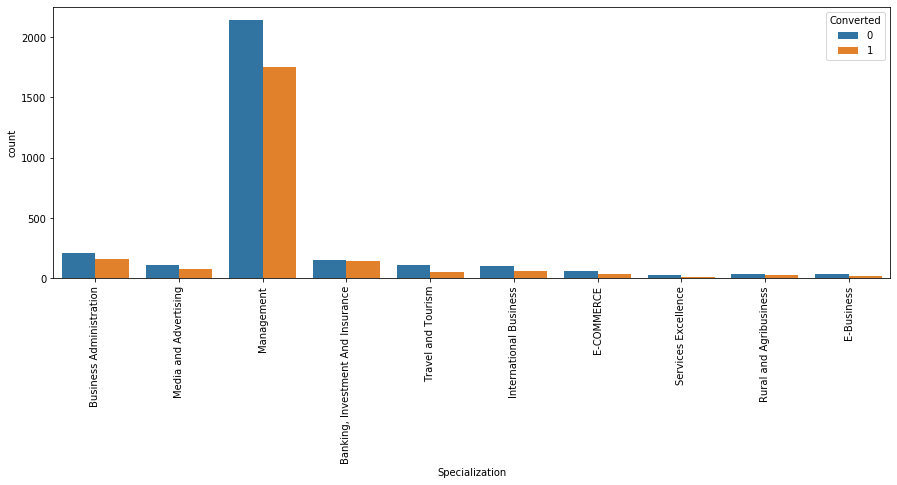

In [239]:
fig, axs = plt.subplots(figsize = (15,5))
s5=sns.countplot(x = "Specialization", hue = "Converted", data = lds)
s5.set_xticklabels(s5.get_xticklabels(),rotation=90)

[Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Thane & Outskirts'),
 Text(0, 0, 'Other Cities'),
 Text(0, 0, 'Other Cities of Maharashtra'),
 Text(0, 0, 'Other Metro Cities'),
 Text(0, 0, 'Tier II Cities')]

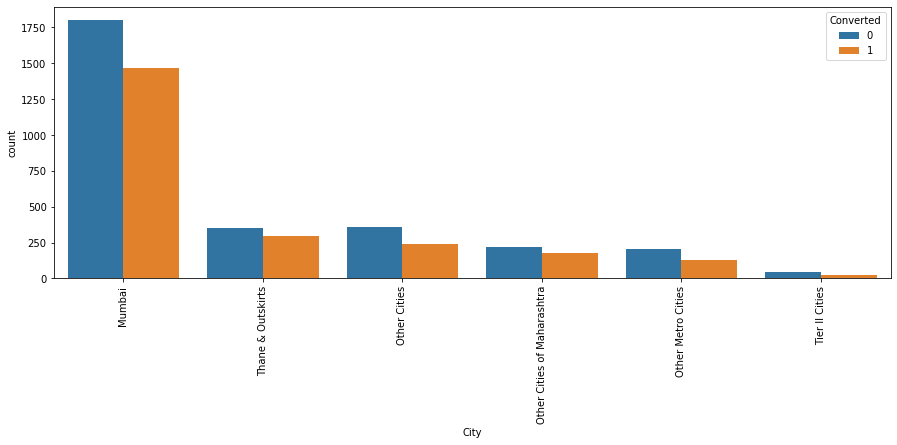

In [240]:
fig, axs = plt.subplots(figsize = (15,5))
s6=sns.countplot(x = "City", hue = "Converted", data = lds)
s6.set_xticklabels(s6.get_xticklabels(),rotation=90)

[Text(0, 0, 'Student'),
 Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Working Professional'),
 Text(0, 0, 'Businessman'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Housewife')]

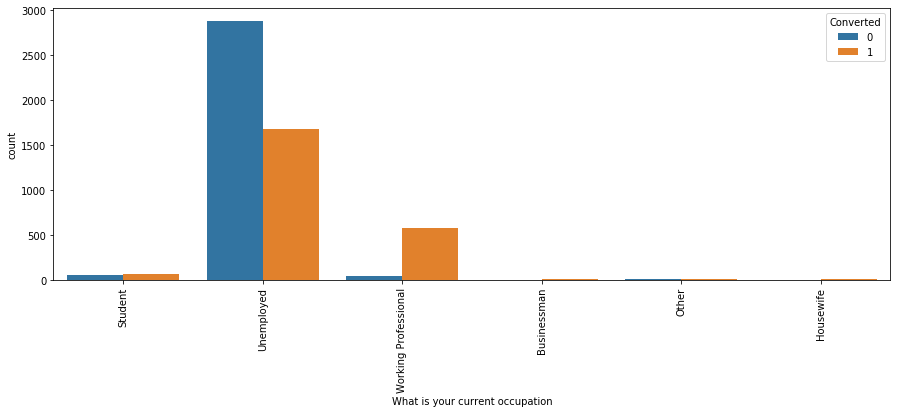

In [241]:
fig, axs = plt.subplots(figsize = (15,5))
s7=sns.countplot(x = "What is your current occupation", hue = "Converted", data = lds)
s7.set_xticklabels(s7.get_xticklabels(),rotation=90)

[Text(0, 0, 'Better Career Prospects'),
 Text(0, 0, 'Flexibility & Convenience'),
 Text(0, 0, 'Other')]

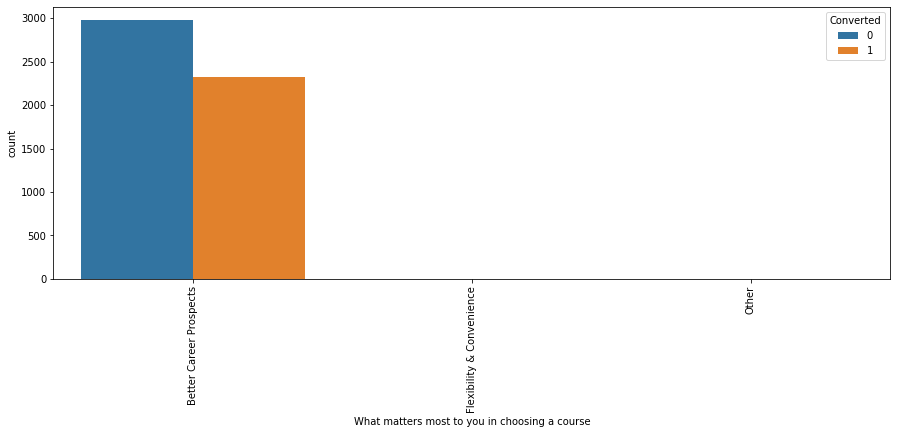

In [242]:
fig, axs = plt.subplots(figsize = (15,5))
s8=sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = lds)
s8.set_xticklabels(s8.get_xticklabels(),rotation=90)

[Text(0, 0, 'India'),
 Text(0, 0, 'Russia'),
 Text(0, 0, 'Kuwait'),
 Text(0, 0, 'Oman'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Qatar'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Ghana'),
 Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'France'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'Hong Kong'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Uganda'),
 Text(0, 0, 'Kenya'),
 Text(0, 0, 'South Africa'),
 Text(0, 0, 'Tanzania'),
 Text(0, 0, 'Malaysia'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Liberia'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Indonesia')]

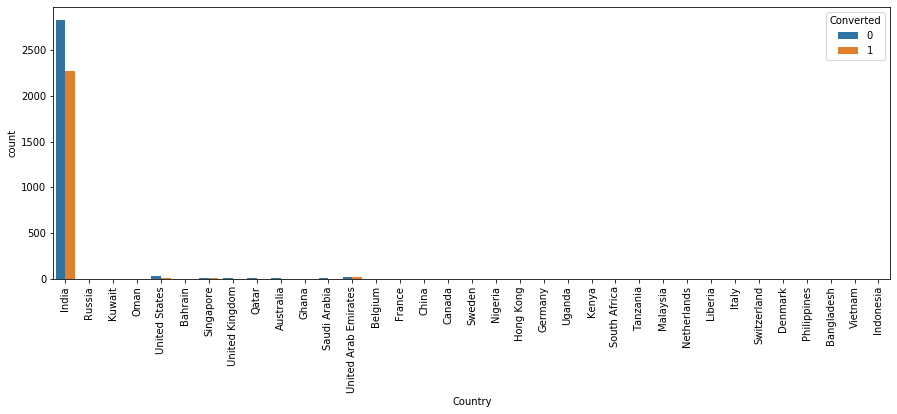

In [243]:
fig, axs = plt.subplots(figsize = (15,5))
s9=sns.countplot(x = "Country", hue = "Converted", data = lds)
s9.set_xticklabels(s9.get_xticklabels(),rotation=90)

In [244]:
lds = lds.drop(['Country','What matters most to you in choosing a course'],axis=1)

In [245]:
lds

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,1,2.0,1640,2.00,Email Opened,Management,Unemployed,Will revert after reading the email,Mumbai,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.00,Email Opened,Management,Unemployed,Unknown,Thane & Outskirts,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,No,0,4.0,58,4.00,Email Opened,Management,Unemployed,Unknown,Mumbai,No,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Others,Management,Unemployed,Will revert after reading the email,Mumbai,No,Others
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Others,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Others,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Management,Unemployed,Unknown,Other Metro Cities,No,SMS Sent


In [246]:
lds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5312 entries, 2 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             5312 non-null   object 
 1   Lead Origin                             5312 non-null   object 
 2   Lead Source                             5312 non-null   object 
 3   Do Not Email                            5312 non-null   object 
 4   Converted                               5312 non-null   int64  
 5   TotalVisits                             5312 non-null   float64
 6   Total Time Spent on Website             5312 non-null   int64  
 7   Page Views Per Visit                    5312 non-null   float64
 8   Last Activity                           5312 non-null   object 
 9   Specialization                          5312 non-null   object 
 10  What is your current occupation         5312 non-null   obje

In [247]:
#Numeric analysis

Converted_rate = (sum(lds['Converted'])/len(lds['Converted'].index))*100
Converted_rate

43.88177710843373

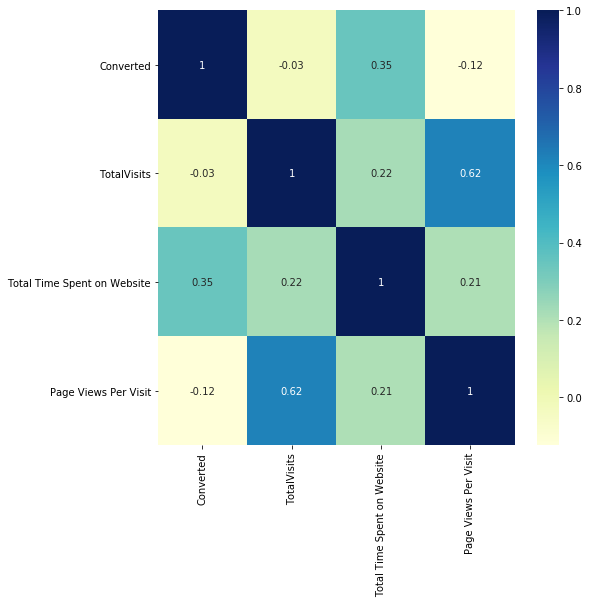

In [248]:
#Checking correlations between numeric values

plt.figure(figsize=(8,8))
sns.heatmap(lds.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [249]:
lds = lds.drop(['Page Views Per Visit'], axis = 1)
lds

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,No,1,2.0,1640,Email Opened,Management,Unemployed,Will revert after reading the email,Mumbai,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,No,0,2.0,71,Email Opened,Management,Unemployed,Unknown,Thane & Outskirts,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,No,0,4.0,58,Email Opened,Management,Unemployed,Unknown,Mumbai,No,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,Others,Management,Unemployed,Will revert after reading the email,Mumbai,No,Others
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,0,2.0,238,SMS Sent,Media and Advertising,Unemployed,Others,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,SMS Sent,Business Administration,Unemployed,Others,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,1,3.0,499,SMS Sent,Management,Unemployed,Unknown,Other Metro Cities,No,SMS Sent


In [250]:
#binary values handling

lst =  ['A free copy of Mastering The Interview','Do Not Email']


def binary_map(x):
    return x.map({'Yes': 1, "No": 0})


lds[lst] = lds[lst].apply(binary_map)

In [251]:
ct_col= lds.select_dtypes(include=['object']).columns
ct_col

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [252]:
#Dummy variable creation for categorical variables

dmy = pd.get_dummies(lds[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity']], drop_first=True)

lds = pd.concat([lds,dmy],axis=1)

In [253]:
lds = lds.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],axis=1)
lds.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,0,1,2.0,1640,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,0,0,2.0,71,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9,af465dfc-7204-4130-9e05-33231863c4b5,0,0,4.0,58,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [254]:
#test-train split

from sklearn.model_selection import train_test_split

In [255]:
x=lds.drop(['Converted','Prospect ID'], axis=1)
y = lds['Converted']

In [256]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [257]:
cols=x_train.select_dtypes(include=['float64', 'int64']).columns

cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [258]:
#Feature scalling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website']])

x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5779,0,0.602371,-0.968103,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1496,0,0.602371,-0.377734,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
998,0,0.602371,-1.074622,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5760,0,-0.709904,-0.845335,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1643,0,-1.584753,-1.076428,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [259]:
#Model building

import statsmodels.api as sm

In [260]:
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3718
Model:                            GLM   Df Residuals:                     3661
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -661.29
Date:                Tue, 13 Jul 2021   Deviance:                       1322.6
Time:                        00:54:22   Pearson chi2:                 7.13e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -28.0017   4.86e+04     -0.001      1.000   -9.52e+04    9.52e+04
Do Not Email                                            -1.2477      0.432     -2.886      0.004      -2.095      -0.400
TotalVisits                                              0.1313      0.089      1.474      0.140      -0.043       0.306
Total Time Spent on Website                              1.0652      0.078     13.723      0.000       0.913       1.217
A free copy of Mastering The Interview                  -0.1769      0.200     -0.886      0.376      -0.568       0.214
Lead Origin_Landing Page Submission                     -0.7722      0.323     -2.390      0.017      -1.405      -0.139
Lead Origin_Lead Add Form                                1.6105      1.289      1.249      0.212      -0.916       4.137
Lead Origin_Lead Import                                  0.3178      0.803      0.396      0.692      -1.256       1.892
Lead Source_Google                                       0.0317      0.223      0.142      0.887      -0.405       0.468
Lead Source_NC_EDM                                      23.3603   4.66e+04      0.001      1.000   -9.14e+04    9.14e+04
Lead Source_Olark Chat                                   0.5744      0.483      1.190      0.234      -0.371       1.520
Lead Source_Organic Search                              -0.1304      0.274     -0.476      0.634      -0.667       0.406
Lead Source_Others                                       0.7208      1.032      0.699      0.485      -1.302       2.743
Lead Source_Reference                                   -0.9488      1.393     -0.681      0.496      -3.679       1.782
Lead Source_Referral Sites                               0.0304      1.356      0.022      0.982      -2.627       2.688
Lead Source_Social Media                                 0.3178      0.803      0.396      0.692      -1.256       1.892
Last Activity_Email Bounced                             -0.5077      0.890     -0.570      0.568      -2.252       1.236
Last Activity_Email Link Clicked                         0.6168      0.976      0.632      0.527      -1.295       2.529
Last Activity_Email Opened                               0.1481      0.555      0.267      0.790      -0.940       1.236
Last Activity_Form Submitted on Website                  0.3645      0.696      0.524      0.600      -1.000       1.729
Last Activity_Had a Phone Conversation                  -0.9813      1.210     -0.811      0.417      -3.352       1.390
Last Activity_Olark Chat Conversation                   -0.2910      0.813     -0.358      0.720      -1.884       1.302
Last Activity_Others                                     0

In [261]:
#RFE

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(lg, 15)             
rfe = rfe.fit(x_train, y_train)

In [262]:
#List of RFE supported columns

cs = x_train.columns[rfe.support_]
cs

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Others', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [263]:
x_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management', 'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       

In [264]:
x_train_sm = sm.add_constant(x_train[cs])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3718
Model:                            GLM   Df Residuals:                     3702
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -691.29
Date:                Tue, 13 Jul 2021   Deviance:                       1382.6
Time:                        00:54:23   Pearson chi2:                 6.13e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9362      0.232     -4.043      0.000      -1.390      -0.482
Do Not Email                                     -1.3213      0.345     -3.827      0.000      -1.998      -0.645
Total Time Spent on Website                       1.0488      0.074     14.084      0.000       0.903       1.195
Lead Origin_Landing Page Submission              -1.0073      0.232     -4.334      0.000      -1.463      -0.552
Lead Origin_Lead Add Form                         0.6036      0.539      1.119      0.263      -0.453       1.661
Lead Source_Others                                1.3122      0.824      1.593      0.111      -0.303       2.927
Last Activity_SMS Sent                            1.3546      0.301      4.498      0.000       0.764       1.945
Tags_Closed by Horizzon                           7.3080      1.035      7.058      0.000       5.279       9.337
Tags_Interested in other courses                 -2.3031      0.651     -3.536      0.000      -3.580      -1.026
Tags_Lost to EINS                                 6.0169      0.747      8.051      0.000       4.552       7.482
Tags_Ringing                                     -2.7527      0.282     -9.754      0.000      -3.306      -2.200
Tags_Will revert after reading the email          4.8208      0.215     22.474      0.000       4.400       5.241
Tags_switched off                                -3.2340      0.748     -4.322      0.000      -4.701      -1.767
Last Notable Activity_Modified                   -1.1993      0.218     -5.505      0.000      -1.626      -0.772
Last Notable Activity_Olark Chat Conversation    -2.0423      1.049     -1.947      0.051      -4.098       0.013
Last Notable Activity_SMS Sent                    0.6622      0.343      1.930      0.054      -0.010       1.335
=================================================================================================================
"""

In [265]:
cs1 = cs.drop('Lead Origin_Lead Add Form')

In [266]:
x_train_sm = sm.add_constant(x_train[cs1])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3718
Model:                            GLM   Df Residuals:                     3703
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -691.96
Date:                Tue, 13 Jul 2021   Deviance:                       1383.9
Time:                        00:54:23   Pearson chi2:                 6.27e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8422      0.215     -3.910      0.000      -1.264      -0.420
Do Not Email                                     -1.3184      0.345     -3.823      0.000      -1.994      -0.642
Total Time Spent on Website                       1.0415      0.074     14.003      0.000       0.896       1.187
Lead Origin_Landing Page Submission              -1.1124      0.213     -5.212      0.000      -1.531      -0.694
Lead Source_Others                                1.5338      0.781      1.965      0.049       0.004       3.064
Last Activity_SMS Sent                            1.3876      0.300      4.631      0.000       0.800       1.975
Tags_Closed by Horizzon                           7.5052      1.025      7.321      0.000       5.496       9.514
Tags_Interested in other courses                 -2.3190      0.653     -3.551      0.000      -3.599      -1.039
Tags_Lost to EINS                                 6.0503      0.747      8.105      0.000       4.587       7.513
Tags_Ringing                                     -2.7507      0.282     -9.752      0.000      -3.304      -2.198
Tags_Will revert after reading the email          4.8747      0.211     23.057      0.000       4.460       5.289
Tags_switched off                                -3.2409      0.750     -4.322      0.000      -4.711      -1.771
Last Notable Activity_Modified                   -1.2131      0.218     -5.554      0.000      -1.641      -0.785
Last Notable Activity_Olark Chat Conversation    -2.1243      1.053     -2.016      0.044      -4.189      -0.059
Last Notable Activity_SMS Sent                    0.6404      0.342      1.870      0.061      -0.031       1.311
=================================================================================================================
"""

In [267]:
cs2 = cs1.drop('Last Notable Activity_SMS Sent')

In [268]:
x_train_sm = sm.add_constant(x_train[cs2])
logm4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3718
Model:                            GLM   Df Residuals:                     3704
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -693.72
Date:                Tue, 13 Jul 2021   Deviance:                       1387.4
Time:                        00:54:23   Pearson chi2:                 6.41e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8013      0.215     -3.729      0.000      -1.222      -0.380
Do Not Email                                     -1.2819      0.345     -3.716      0.000      -1.958      -0.606
Total Time Spent on Website                       1.0382      0.074     14.022      0.000       0.893       1.183
Lead Origin_Landing Page Submission              -1.1005      0.214     -5.131      0.000      -1.521      -0.680
Lead Source_Others                                1.5835      0.777      2.037      0.042       0.060       3.107
Last Activity_SMS Sent                            1.8696      0.154     12.136      0.000       1.568       2.172
Tags_Closed by Horizzon                           7.6661      1.024      7.487      0.000       5.659       9.673
Tags_Interested in other courses                 -2.2878      0.651     -3.515      0.000      -3.564      -1.012
Tags_Lost to EINS                                 6.1835      0.748      8.266      0.000       4.717       7.650
Tags_Ringing                                     -2.6897      0.278     -9.677      0.000      -3.234      -2.145
Tags_Will revert after reading the email          4.9299      0.213     23.143      0.000       4.512       5.347
Tags_switched off                                -3.1658      0.747     -4.239      0.000      -4.630      -1.702
Last Notable Activity_Modified                   -1.4812      0.171     -8.677      0.000      -1.816      -1.147
Last Notable Activity_Olark Chat Conversation    -2.1970      1.064     -2.064      0.039      -4.283      -0.111
=================================================================================================================
"""

In [269]:
cs3 = cs2.drop('Lead Source_Others')

In [270]:
x_train_sm = sm.add_constant(x_train[cs3])
logm5 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3718
Model:                            GLM   Df Residuals:                     3705
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -695.70
Date:                Tue, 13 Jul 2021   Deviance:                       1391.4
Time:                        00:54:23   Pearson chi2:                 6.42e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.7496      0.212     -3.529      0.000      -1.166      -0.333
Do Not Email                                     -1.2772      0.345     -3.697      0.000      -1.954      -0.600
Total Time Spent on Website                       1.0300      0.074     13.971      0.000       0.885       1.174
Lead Origin_Landing Page Submission              -1.1389      0.213     -5.342      0.000      -1.557      -0.721
Last Activity_SMS Sent                            1.8714      0.154     12.169      0.000       1.570       2.173
Tags_Closed by Horizzon                           7.6440      1.024      7.468      0.000       5.638       9.650
Tags_Interested in other courses                 -2.3093      0.651     -3.548      0.000      -3.585      -1.034
Tags_Lost to EINS                                 6.1890      0.748      8.278      0.000       4.724       7.654
Tags_Ringing                                     -2.7003      0.278     -9.723      0.000      -3.245      -2.156
Tags_Will revert after reading the email          4.9112      0.212     23.132      0.000       4.495       5.327
Tags_switched off                                -3.1817      0.747     -4.258      0.000      -4.646      -1.717
Last Notable Activity_Modified                   -1.4845      0.171     -8.700      0.000      -1.819      -1.150
Last Notable Activity_Olark Chat Conversation    -2.2229      1.061     -2.094      0.036      -4.303      -0.142
=================================================================================================================
"""

In [271]:
cs4 = cs3.drop('Last Notable Activity_Olark Chat Conversation')

In [272]:
x_train_sm = sm.add_constant(x_train[cs4])
logm6 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3718
Model:                            GLM   Df Residuals:                     3706
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -698.23
Date:                Tue, 13 Jul 2021   Deviance:                       1396.5
Time:                        00:54:23   Pearson chi2:                 6.38e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8225      0.210     -3.914      0.000      -1.234      -0.411
Do Not Email                                -1.2741      0.345     -3.698      0.000      -1.949      -0.599
Total Time Spent on Website                  1.0190      0.073     13.893      0.000       0.875       1.163
Lead Origin_Landing Page Submission         -1.0803      0.211     -5.118      0.000      -1.494      -0.667
Last Activity_SMS Sent                       1.8862      0.154     12.288      0.000       1.585       2.187
Tags_Closed by Horizzon                      7.6582      1.024      7.480      0.000       5.652       9.665
Tags_Interested in other courses            -2.3695      0.652     -3.632      0.000      -3.648      -1.091
Tags_Lost to EINS                            6.1834      0.748      8.269      0.000       4.718       7.649
Tags_Ringing                                -2.6859      0.277     -9.685      0.000      -3.230      -2.142
Tags_Will revert after reading the email     4.9137      0.212     23.176      0.000       4.498       5.329
Tags_switched off                           -3.1681      0.746     -4.247      0.000      -4.630      -1.706
Last Notable Activity_Modified              -1.4657      0.170     -8.613      0.000      -1.799      -1.132
============================================================================================================
"""

In [273]:
# Checking VIF  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [274]:
vif = pd.DataFrame()
vif['Features'] = x_train[cs4].columns
vif['VIF'] = [variance_inflation_factor(x_train[cs4].values, i) for i in range(x_train[cs4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.43
10,Last Notable Activity_Modified,1.60
3,Last Activity_SMS Sent,1.59
8,Tags_Will revert after reading the email,1.51
7,Tags_Ringing,1.33
0,Do Not Email,1.17
5,Tags_Interested in other courses,1.11
1,Total Time Spent on Website,1.08
9,Tags_switched off,1.08
4,Tags_Closed by Horizzon,1.07


In [275]:
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

5779    0.002335
1496    0.092142
998     0.003389
5760    0.004277
1643    0.952316
35      0.846693
105     0.049565
5479    0.715676
9017    0.986468
1262    0.060577
dtype: float64

In [276]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00233491, 0.09214186, 0.00338894, 0.0042771 , 0.9523162 ,
       0.84669342, 0.04956479, 0.71567624, 0.98646822, 0.06057673])

In [277]:
y_train_pred_new = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_new['Prospect ID'] = y_train.index
y_train_pred_new.head()

,Converted,Converted_prob,Prospect ID
0,0,0.002335,5779
1,0,0.092142,1496
2,0,0.003389,998
3,0,0.004277,5760
4,1,0.952316,1643


In [278]:
y_train_pred_new['Predicted'] = y_train_pred_new.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_new

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.002335,5779,0
1,0,0.092142,1496,0
2,0,0.003389,998,0
3,0,0.004277,5760,0
4,1,0.952316,1643,1
...,...,...,...,...
3713,0,0.017315,7252,0
3714,0,0.009753,3453,0
3715,0,0.003134,743,0
3716,1,0.954504,150,1


In [279]:
# Confusion matrix

from sklearn import metrics 
confusion = metrics.confusion_matrix(y_train_pred_new.Converted, y_train_pred_new.Predicted )
print(confusion)

[[1986   91]
 [ 171 1470]]


In [280]:
#Accuracy of train data

print(metrics.accuracy_score(y_train_pred_new.Converted, y_train_pred_new.Predicted))

0.9295320064550834


In [281]:
#True positive 

TP = confusion[1,1]

#True negatives

TN = confusion[0,0] 

#False positives

FP = confusion[0,1] 

#False negatives

FN = confusion[1,0] 

In [282]:
#Sensitivity/ Recall

TP / float(TP+FN)

0.8957952468007313

In [283]:
#Specificity

TN / float(TN+FP)

0.9561868078960039

In [284]:
#False Postive Rate

FP/ float(TN+FP)

0.043813192103996146

In [285]:
#True Postive Rate/ Precision

TP / float(TP+FP)

0.9417040358744395

In [286]:
#Negative predictive rate

TN / float(TN+ FN)

0.9207232267037552

In [287]:
#ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

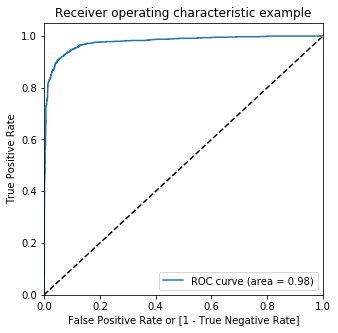

In [288]:
draw_roc(y_train_pred_new.Converted, y_train_pred_new.Converted_prob)

In [289]:
#Optimal Cutoff Point

nos = [float(x)/10 for x in range(10)]
for i in nos:
    y_train_pred_new[i]= y_train_pred_new.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_new.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002335,5779,0,1,0,0,0,0,0,0,0,0,0
1,0,0.092142,1496,0,1,0,0,0,0,0,0,0,0,0
2,0,0.003389,998,0,1,0,0,0,0,0,0,0,0,0
3,0,0.004277,5760,0,1,0,0,0,0,0,0,0,0,0
4,1,0.952316,1643,1,1,1,1,1,1,1,1,1,1,1


In [290]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

In [291]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_new.Converted, y_train_pred_new[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.441366  1.000000  0.000000
0.1   0.1  0.869554  0.976843  0.784786
0.2   0.2  0.912318  0.961609  0.873375
0.3   0.3  0.922808  0.939062  0.909966
0.4   0.4  0.929532  0.912858  0.942706
0.5   0.5  0.929532  0.895795  0.956187
0.6   0.6  0.925229  0.878123  0.962446
0.7   0.7  0.920925  0.854357  0.973519
0.8   0.8  0.914201  0.831200  0.979779
0.9   0.9  0.895912  0.780012  0.987482


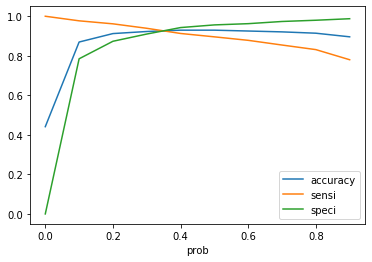

In [292]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [293]:
#0.4 is the optimum point to take it as a cutoff probability.

y_train_pred_new['final_predicted'] = y_train_pred_new.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_new.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.002335,5779,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.092142,1496,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.003389,998,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.004277,5760,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.952316,1643,1,1,1,1,1,1,1,1,1,1,1,1


In [294]:
#Lead score assigning

y_train_pred_new['Lead_Score'] = y_train_pred_new.Converted_prob.map( lambda x: round(x*100))
y_train_pred_new.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.002335,5779,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.092142,1496,0,1,0,0,0,0,0,0,0,0,0,0,9
2,0,0.003389,998,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.004277,5760,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0.952316,1643,1,1,1,1,1,1,1,1,1,1,1,1,95


In [295]:
#Overall accuracy

metrics.accuracy_score(y_train_pred_new.Converted, y_train_pred_new.final_predicted)

0.9295320064550834

In [296]:
metrics.accuracy_score(y_train_pred_new.Converted, y_train_pred_new.final_predicted)

confusion1 = metrics.confusion_matrix(y_train_pred_new.Converted, y_train_pred_new.final_predicted )
confusion1

#True positive
TP = confusion1[1,1] 

#True negatives
TN = confusion1[0,0] 

#False positives
FP = confusion1[0,1] 
 
#False negatives
FN = confusion1[1,0]

In [297]:
confusion1

array([[1958,  119],
       [ 143, 1498]], dtype=int64)

In [298]:
#Sensitivity/ Recall

TP / float(TP+FN)

0.9128580134064594

In [299]:
#Specificity

TN / float(TN+FP)

0.9427058257101589

In [300]:
#True Postive Rate/ Precision

TP / float(TP+FP)

0.9264069264069265

In [301]:
#False Postive Rate

FP/ float(TN+FP)

0.05729417428984112

In [302]:
#Negative predictive rate

TN / float(TN+ FN)

0.9319371727748691

In [303]:
#F1 score

Precision= TP / float(TP+FP)
Recall=TP / float(TP+FN) 
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.9195825659914058

In [304]:
from sklearn.metrics import precision_recall_curve

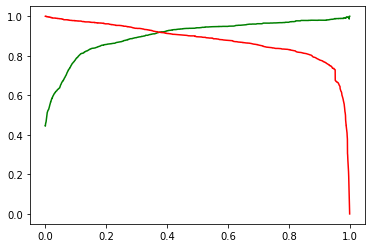

In [305]:
p, r, thresholds = precision_recall_curve(y_train_pred_new.Converted, y_train_pred_new.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [306]:
#Predictions on test set

In [307]:
#scalling data

cols=x_test.select_dtypes(include=['float64', 'int64']).columns

x_test[cols] = scaler.fit_transform(x_test[cols])

In [308]:
x_test = x_test[cs4]
x_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified
7311,-0.292969,-0.324448,1,0,0,0,0,0,0,0,0
4838,-0.292969,-1.081048,0,1,0,0,0,0,1,0,0
1720,-0.292969,0.235400,0,0,0,0,0,0,1,0,0
9210,-0.292969,0.577032,1,0,0,0,0,0,1,0,1
5366,-0.292969,0.217513,1,0,0,1,0,0,0,0,1


In [309]:
x_test_sm = sm.add_constant(x_test)

In [310]:
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

7311    0.134682
4838    0.994775
1720    0.991026
9210    0.924593
5366    0.005806
4687    0.031352
8693    0.030289
7953    0.996491
5656    0.997313
2151    0.100435
dtype: float64

In [311]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7311,0.134682
4838,0.994775
1720,0.991026
9210,0.924593
5366,0.005806


In [312]:
y_test_df = pd.DataFrame(y_test)

In [313]:
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
7311,0,7311
4838,1,4838
1720,1,1720
9210,1,9210
5366,0,5366


In [314]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [315]:
y_pred_new = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_new.head()

,Converted,Prospect ID,0
0,0,7311,0.134682
1,1,4838,0.994775
2,1,1720,0.991026
3,1,9210,0.924593
4,0,5366,0.005806


In [316]:
y_pred_new= y_pred_new.rename(columns={ 0 : 'Converted_prob'})
y_pred_new.head()

,Converted,Prospect ID,Converted_prob
0,0,7311,0.134682
1,1,4838,0.994775
2,1,1720,0.991026
3,1,9210,0.924593
4,0,5366,0.005806


In [317]:
y_pred_new = y_pred_new[['Prospect ID','Converted','Converted_prob']]
y_pred_new['Lead_Score'] = y_pred_new.Converted_prob.map( lambda x: round(x*100))
y_pred_new.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7311,0,0.134682,13
1,4838,1,0.994775,99
2,1720,1,0.991026,99
3,9210,1,0.924593,92
4,5366,0,0.005806,1


In [318]:
y_pred_new['final_predicted'] = y_pred_new.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_new.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_predicted
0,7311,0,0.134682,13,0
1,4838,1,0.994775,99,1
2,1720,1,0.991026,99,1
3,9210,1,0.924593,92,1
4,5366,0,0.005806,1,0


In [319]:
#Overall accuracy test data

metrics.accuracy_score(y_pred_new.Converted, y_pred_new.final_predicted)

0.917189460476788

In [320]:
confusion1 = metrics.confusion_matrix(y_pred_new.Converted, y_pred_new.final_predicted )
confusion1

array([[826,  78],
       [ 54, 636]], dtype=int64)

In [321]:
#True positive
TP = confusion1[1,1] 

#True negatives
TN = confusion1[0,0] 

#False positives
FP = confusion1[0,1] 
 
#False negatives
FN = confusion1[1,0]

In [322]:
#Sensitivity/ Recall

TP / float(TP+FN)

0.9217391304347826

In [323]:
#Specificity

TN / float(TN+FP)

0.9137168141592921

In [324]:
#True Postive Rate/ Precision

TP / float(TP+FP)

0.8907563025210085

In [325]:
#False Postive Rate

FP/ float(TN+FP)

0.08628318584070796

In [326]:
#Negative predictive rate

TN / float(TN+ FN)

0.9386363636363636

In [327]:
#F1 score

Precision= TP / float(TP+FP)
Recall=TP / float(TP+FN) 
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.905982905982906

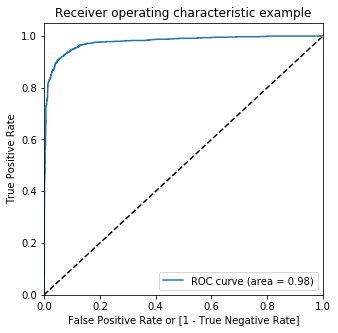

In [328]:
draw_roc(y_train_pred_new.Converted, y_train_pred_new.Converted_prob)